In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding the data

In [2]:
sixth_sem = pd.read_excel('6th_Sem_Data.xls')
sixth_sem.head()

,Roll No,Name of the Student,Section,Prg_Elec_1,Prg_Elec_2,Inter_Disc_Elec_1,Core_1,Core_2,Core_3,Lab_1,Lab_2,Lab_3,GPA
0,3210316101,A LEELA PRASAD,A,A,B+,B+,B+,B+,B+,A+,A+,A,7.50
1,3210316102,AGILE VAMSIDHAR REDDY,A,B,F,P,F,F,F,A,B+,A,0.00
2,3210316103,ALAMPALLI VENKATA MONIKA,A,A,A+,A,A,A+,A+,O,O,O,8.83
3,3210316104,SHAIK ABDUL RAHEEM,A,B,B+,B,F,B,B,B+,B,P,0.00
4,3210316105,ACHYUTHA VISHNUTEJA,A,B,B,B+,C,P,P,B+,C,B+,5.46


In [3]:
sixth_sem.shape

(380, 13)

In [4]:
sixth_sem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Roll No              380 non-null    int64  
 1   Name of the Student  380 non-null    object 
 2   Section              380 non-null    object 
 3   Prg_Elec_1           380 non-null    object 
 4   Prg_Elec_2           380 non-null    object 
 5   Inter_Disc_Elec_1    380 non-null    object 
 6   Core_1               380 non-null    object 
 7   Core_2               380 non-null    object 
 8   Core_3               380 non-null    object 
 9   Lab_1                380 non-null    object 
 10  Lab_2                380 non-null    object 
 11  Lab_3                380 non-null    object 
 12  GPA                  380 non-null    float64
dtypes: float64(1), int64(1), object(11)
memory usage: 38.7+ KB


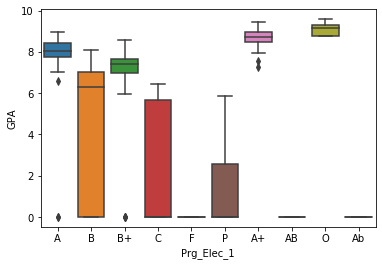

In [5]:
sns.boxplot(data = sixth_sem, x = 'Prg_Elec_1', y = 'GPA')

### Data Cleaning

Some of the values are repeated so cleaning them

In [6]:
sixth_sem.Prg_Elec_1.value_counts()

B+    97
B     84
A     77
F     50
A+    31
C     20
P     11
O      7
AB     2
Ab     1
Name: Prg_Elec_1, dtype: int64

In [7]:
sixth_sem.Prg_Elec_1 = sixth_sem.Prg_Elec_1.replace('Ab','AB')

In [8]:
sixth_sem.Prg_Elec_1.value_counts()

B+    97
B     84
A     77
F     50
A+    31
C     20
P     11
O      7
AB     3
Name: Prg_Elec_1, dtype: int64

In [9]:
sixth_sem.Inter_Disc_Elec_1.value_counts()

B+    120
B      86
A      85
A+     29
C      28
F      16
P      13
AB      2
 A      1
Name: Inter_Disc_Elec_1, dtype: int64

In [10]:
sixth_sem.Inter_Disc_Elec_1 = sixth_sem.Inter_Disc_Elec_1.replace(' A','A')

In [11]:
sixth_sem.Inter_Disc_Elec_1.value_counts()

B+    120
B      86
A      86
A+     29
C      28
F      16
P      13
AB      2
Name: Inter_Disc_Elec_1, dtype: int64

In [12]:
sixth_sem.Core_1.value_counts()

B     85
B+    85
A     58
P     39
C     33
A+    33
F     28
F     14
O      4
AB     1
Name: Core_1, dtype: int64

In [13]:
sixth_sem.Core_1 = sixth_sem.Core_1.replace('F ', 'F')

In [14]:
sixth_sem.Core_1.value_counts()

B     85
B+    85
A     58
F     42
P     39
C     33
A+    33
O      4
AB     1
Name: Core_1, dtype: int64

In [15]:
sixth_sem.Core_2.value_counts()

B     106
B+     87
A      55
F      50
C      38
P      23
A+     14
P       5
AB      1
O       1
Name: Core_2, dtype: int64

In [16]:
sixth_sem.Core_2 = sixth_sem.Core_2.replace('P ', 'P')

In [17]:
sixth_sem.Core_2.value_counts()

B     106
B+     87
A      55
F      50
C      38
P      28
A+     14
AB      1
O       1
Name: Core_2, dtype: int64

In [18]:
sixth_sem.Lab_1.value_counts()

A+    155
O     136
A      62
B+     17
P       5
B       3
C       1
A       1
Name: Lab_1, dtype: int64

In [19]:
sixth_sem.Lab_1 = sixth_sem.Lab_1.replace('A ', 'A')

In [20]:
sixth_sem.Lab_1.value_counts()

A+    155
O     136
A      63
B+     17
P       5
B       3
C       1
Name: Lab_1, dtype: int64

In [21]:
#Replacing the grades with corresponding number labeling as follows:
# 'O':10,'A+':9,'A':8,'B+':7,'B':6,'C':5,'P':4,'F':2, 'AB':0
# instead of dummification.
cols = ['Prg_Elec_1', 'Prg_Elec_2','Inter_Disc_Elec_1', 'Core_1', 'Core_2', 'Core_3', 'Lab_1', 'Lab_2','Lab_3']
replace_val = {'O':10,'A+':9,'A':8,'B+':7,'B':6,'C':5,'P':4,'F':2, 'AB':0}
sixth_sem[cols] = sixth_sem[cols].replace(replace_val)

In [22]:
sixth_sem.head()

,Roll No,Name of the Student,Section,Prg_Elec_1,Prg_Elec_2,Inter_Disc_Elec_1,Core_1,Core_2,Core_3,Lab_1,Lab_2,Lab_3,GPA
0,3210316101,A LEELA PRASAD,A,8,7,7,7,7,7,9,9,8,7.50
1,3210316102,AGILE VAMSIDHAR REDDY,A,6,2,4,2,2,2,8,7,8,0.00
2,3210316103,ALAMPALLI VENKATA MONIKA,A,8,9,8,8,9,9,10,10,10,8.83
3,3210316104,SHAIK ABDUL RAHEEM,A,6,7,6,2,6,6,7,6,4,0.00
4,3210316105,ACHYUTHA VISHNUTEJA,A,6,6,7,5,4,4,7,5,7,5.46


### EDA
The data set consists of only categorical values so bivariate analysis can be done across the target variable 'GPA' to get to know the spread and any outlier present.

#### Univariate Analysis

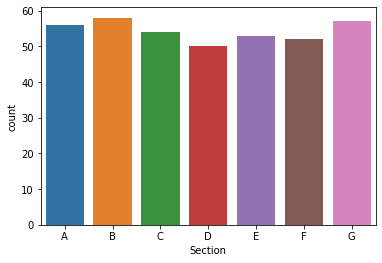

In [23]:
# Number students in each section
sns.countplot(sixth_sem.Section)

In [24]:
sub = ['Prg_Elec_1','Prg_Elec_2','Inter_Disc_Elec_1','Core_1','Core_2','Core_3','Lab_1','Lab_2','Lab_3']

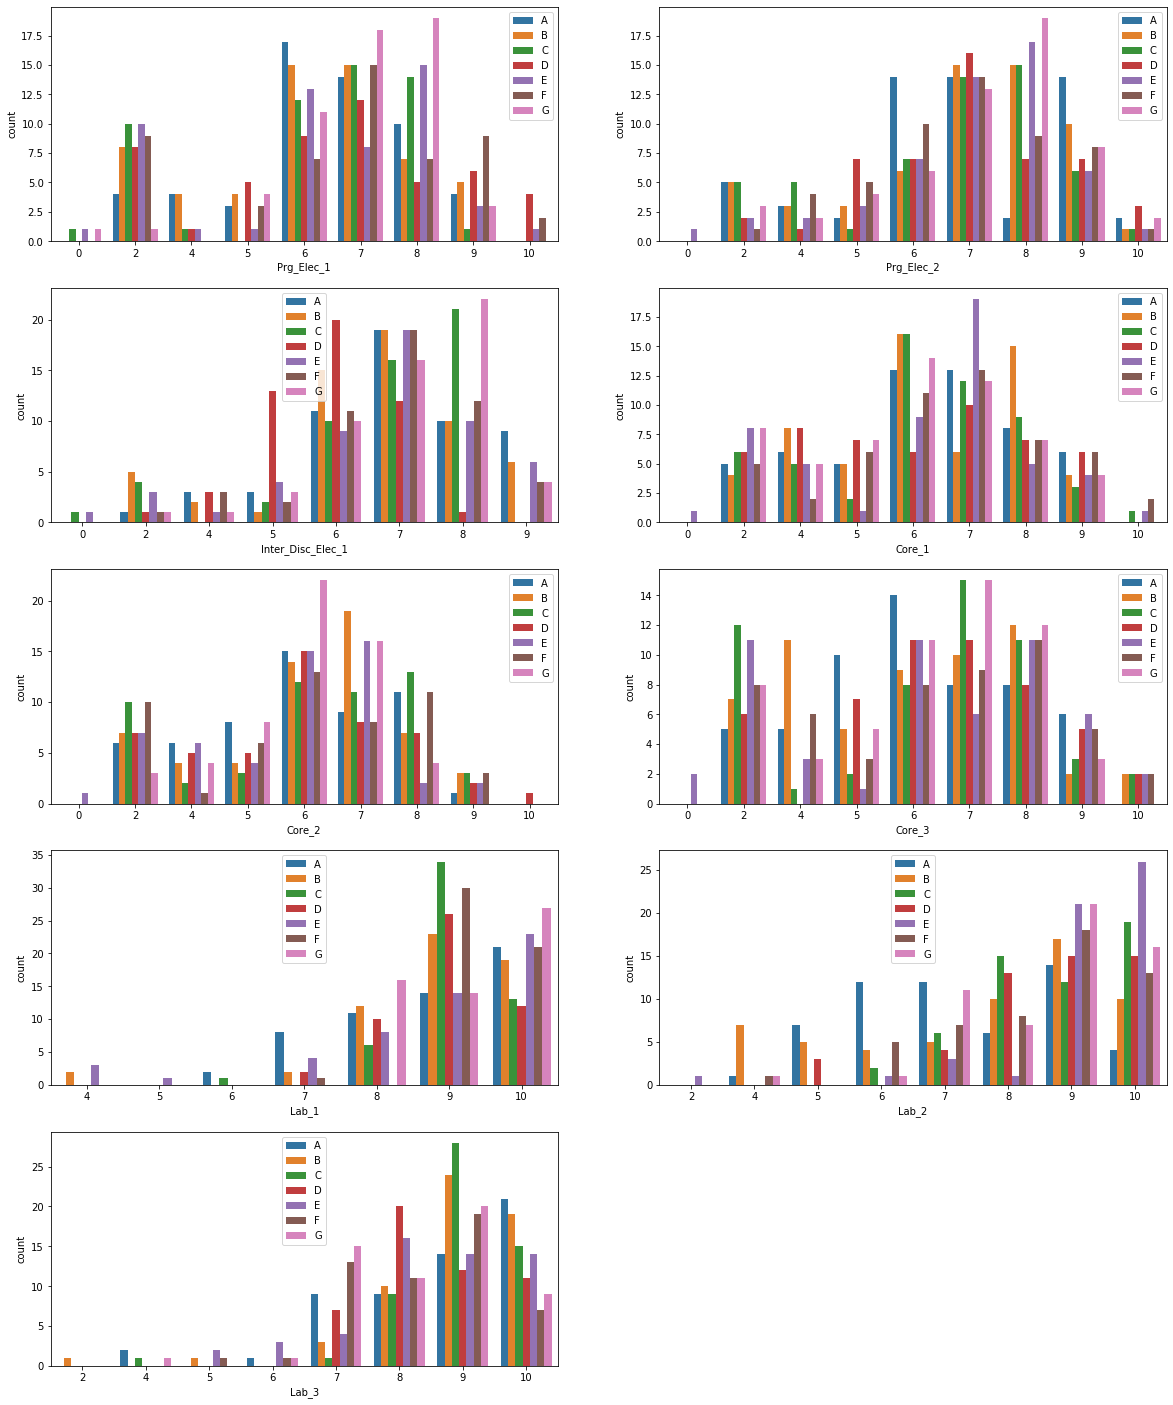

In [25]:
# Univariate Analysis
plt.figure(figsize = [20,25])
for i in range(0,9):
    plt.subplot(5,2,i+1)
    sns.countplot(sixth_sem[sub[i]], hue = sixth_sem.Section)
    plt.legend(loc = 'best')
plt.show()

`Inferences:` 
- The above plot shows the count of the students scoring particular grade in each subject in comparison with other sections.
- It's evident that hardly few students have failed in labs and most of them have atleast scored A-grade (specified as 8) which implies that the students results are reasonably good in labs.
- For theory subjects, most of the students grading is between 6 and 10 (i.e., B and O).

#### Bivariate Analysis

In [26]:
sixth_sem.GPA.describe()

count    380.000000
mean       5.442053
std        3.475326
min        0.000000
25%        0.000000
50%        7.080000
75%        7.960000
max        9.580000
Name: GPA, dtype: float64

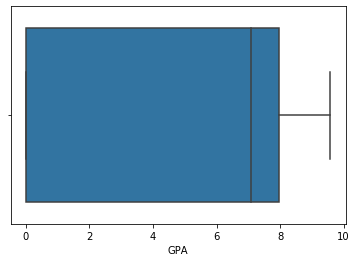

In [27]:
sns.boxplot(sixth_sem.GPA)

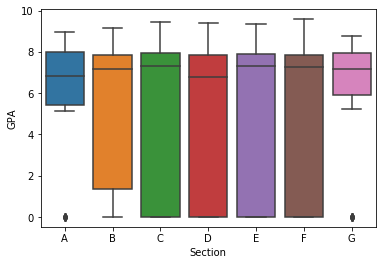

In [28]:
sns.boxplot(x = 'Section', y = 'GPA', data = sixth_sem)
plt.show()

`Inferences:`:
- The IQR range of Section 'A' and 'G' is between 5 and 10 which implies that most of the students study well and comparitively minimum number of students who have failed or the students have not appeared in the exams. This is the reason for the outliers present in these two sections.
- In other sections the IQR range is spread between 0 and 10 which implies in these section there are students who belongs to all categories i.e., slow learners, average learners and fast learners.

In [29]:
sixth_sem[(sixth_sem.GPA == 0.0) & (sixth_sem.Section == 'G')].count()

Roll No                13
Name of the Student    13
Section                13
Prg_Elec_1             13
Prg_Elec_2             13
Inter_Disc_Elec_1      13
Core_1                 13
Core_2                 13
Core_3                 13
Lab_1                  13
Lab_2                  13
Lab_3                  13
GPA                    13
dtype: int64

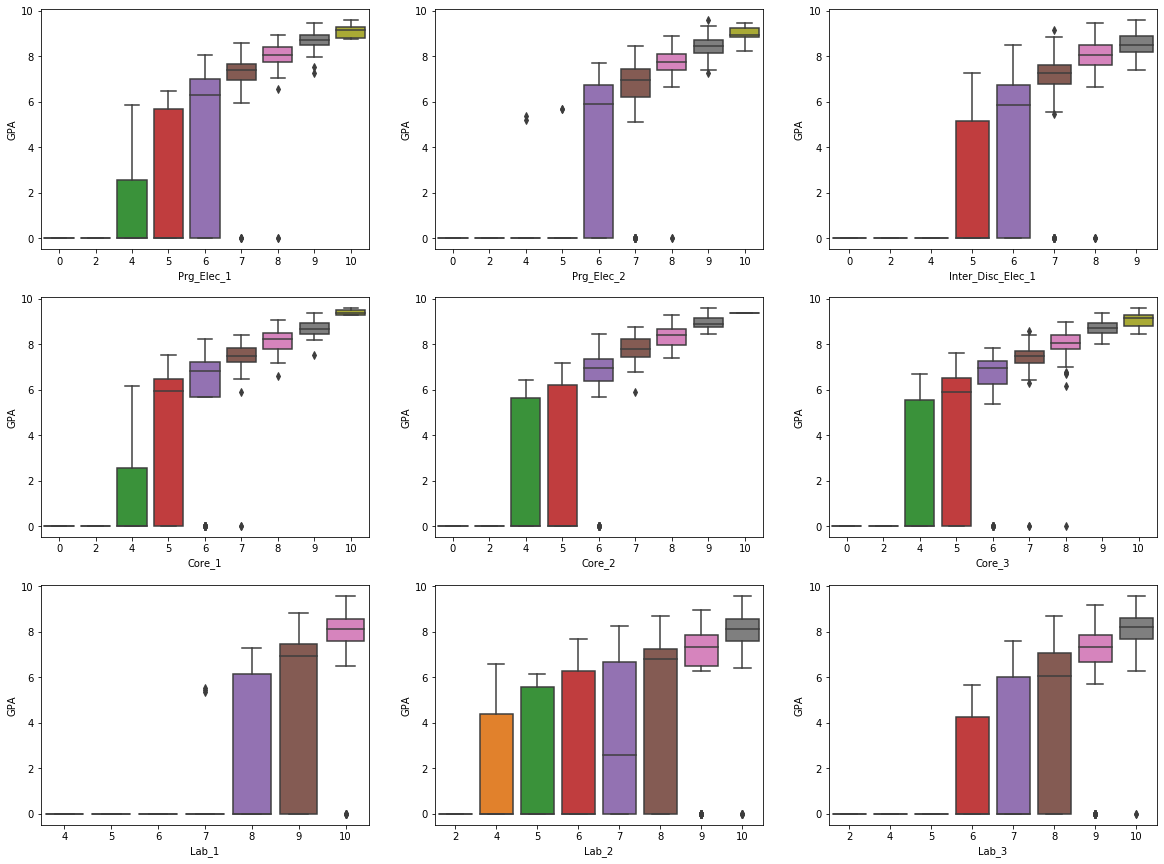

In [30]:
plt.figure(figsize = [20,15])
for i in range(0,9):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = sub[i], y = 'GPA', data = sixth_sem)
plt.show()

`Inferences:`
- There are some outliers in the above plots but cannot be called as outliers but they are indeed the right value.
- For example, let me consider the first plot, i.e., Prog_Elec_1 vs GPA, students who have scored 7 or 8 grade in that subject have got 0 GPA, this means though the students have scored good marks in Prg_Elec_1, thet have failed in one or more other subjects. Hence the data point looks as a outlier.
- In similar fashion other plots can be interpreted.

### Splitting the Data

In [31]:
# Splitting data into X and y

# Response / Dependent Variable to 'y'
y = sixth_sem.GPA
y

0      7.50
1      0.00
2      8.83
3      0.00
4      5.46
       ... 
375    0.00
376    7.88
377    8.46
378    0.00
379    0.00
Name: GPA, Length: 380, dtype: float64

In [32]:
# Independent Variables to X
X = sixth_sem.drop(['Roll No', 'Name of the Student','Section', 'GPA'], 1)
X.head()

,Prg_Elec_1,Prg_Elec_2,Inter_Disc_Elec_1,Core_1,Core_2,Core_3,Lab_1,Lab_2,Lab_3
0,8,7,7,7,7,7,9,9,8
1,6,2,4,2,2,2,8,7,8
2,8,9,8,8,9,9,10,10,10
3,6,7,6,2,6,6,7,6,4
4,6,6,7,5,4,4,7,5,7


In [33]:
# dividing the data to train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state  = 100)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(266, 9)
(114, 9)
(266,)
(114,)


### Building Linear Model
#### Interpretable Model using Linear Regression (OLS Algorithm)

In [35]:
# import necessary library

X_train = sm.add_constant(X_train)
y_train0 = y_train
lm0 = sm.OLS(y_train0, X_train).fit()
lm0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 03 May 2021   Prob (F-statistic):           2.07e-95
Time:                        18:44:28   Log-Likelihood:                -470.21
No. Observations:                 266   AIC:                             960.4
Df Residuals:                     256   BIC:                             996.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.1721      0.869     -2.499      0.013      -3.884      -0.460
Prg_Elec_1            0.3317      0.079      4.191      0.000       0.176       0.488
Prg_Elec_2            0.1190      0.096      1.246      0.214      -0.069       0.307
Inter_Disc_Elec_1    -0.0494      0.092     -0.535      0.593      -0.231       0.132
Core_1                0.4624      0.078      5.916      0.000       0.308       0.616
Core_2                0.3913      0.091      4.285      0.000       0.211       0.571
Core_3                0.5999      0.072      8.321      0.000       0.458       0.742
Lab_1                -0.2241      0.132     -1.704      0.090      -0.483       0.035
Lab_2                -0.1923      0.075     -2.576      0.011      -0.339      -0.045
Lab_3                -0.0048      0.105     -0.046      0.963      -0.212       0.202
==============================================================================
Omnibus:                       32.611   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.932
Skew:                          -0.885   Prob(JB):                     1.29e-09
Kurtosis:                       3.746   Cond. No.                         215.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,96.31
5,Core_2,4.05
2,Prg_Elec_2,3.88
1,Prg_Elec_1,3.78
6,Core_3,3.48
4,Core_1,3.09
3,Inter_Disc_Elec_1,2.81
7,Lab_1,2.64
9,Lab_3,2.21
8,Lab_2,1.76


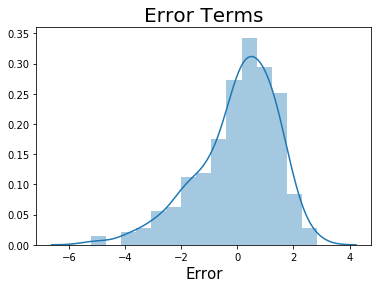

In [37]:
# To check error terms are normally distributed

y_train_pred0 = lm0.predict(X_train)

sns.distplot((y_train - y_train_pred0))
plt.title('Error Terms', fontsize =20)
plt.xlabel('Error', fontsize = 15)
plt.show()

In [38]:
cols0 = X_train.columns

In [39]:
X_test_0 = sm.add_constant(X_test)

X_test_0 = X_test_0[cols0]

In [40]:
y_test_pred0 = lm0.predict(X_test_0)

In [41]:
# R2-Score and MSE on train set
print('Training Set:')
print(r2_score(y_train, y_train_pred0))
print(mean_squared_error(y_train, y_train_pred0))

# R2-Score and MSE on test set
print('Testing Set:')
print(r2_score(y_test, y_test_pred0))
print(mean_squared_error(y_test, y_test_pred0))

Training Set:
0.8367405461852757
2.008808517139521
Testing Set:
0.7916807894322034
2.3590165200596305


`Inferences on Initail Model (lm0):`
- In the initial model, few of the subjects looks insignificant by looking at the p-value but according to the VIF, all subjects are not collinear to each other.
- Even though the model looks fine let me drop the insignificant subjects.

In [42]:
# Drop Lab_3 as p-value = 0.963
X_train_new = X_train.drop('Lab_3',1)

In [43]:
lm1 = sm.add_constant(X_train_new)
lm1 = sm.OLS(y_train, X_train_new).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     164.6
Date:                Mon, 03 May 2021   Prob (F-statistic):           1.56e-96
Time:                        18:44:29   Log-Likelihood:                -470.21
No. Observations:                 266   AIC:                             958.4
Df Residuals:                     257   BIC:                             990.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.1844      0.825     -2.647      0.009      -3.810      -0.559
Prg_Elec_1            0.3320      0.079      4.217      0.000       0.177       0.487
Prg_Elec_2            0.1186      0.095      1.251      0.212      -0.068       0.305
Inter_Disc_Elec_1    -0.0496      0.092     -0.539      0.590      -0.231       0.132
Core_1                0.4623      0.078      5.928      0.000       0.309       0.616
Core_2                0.3907      0.090      4.321      0.000       0.213       0.569
Core_3                0.5995      0.072      8.378      0.000       0.459       0.740
Lab_1                -0.2264      0.122     -1.857      0.064      -0.466       0.014
Lab_2                -0.1924      0.074     -2.585      0.010      -0.339      -0.046
==============================================================================
Omnibus:                       32.595   Durbin-Watson:                   1.907
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.906
Skew:                          -0.885   Prob(JB):                     1.31e-09
Kurtosis:                       3.746   Cond. No.                         189.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
# Drop Inter_Disc_Elec_1 as p-value=0.59
X_train_new = X_train_new.drop('Inter_Disc_Elec_1',1)

lm2 = sm.add_constant(X_train_new)
lm2 = sm.OLS(y_train, X_train_new).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     188.6
Date:                Mon, 03 May 2021   Prob (F-statistic):           1.27e-97
Time:                        18:44:29   Log-Likelihood:                -470.36
No. Observations:                 266   AIC:                             956.7
Df Residuals:                     258   BIC:                             985.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2220      0.821     -2.706      0.007      -3.839      -0.605
Prg_Elec_1     0.3251      0.078      4.190      0.000       0.172       0.478
Prg_Elec_2     0.1075      0.092      1.163      0.246      -0.075       0.289
Core_1         0.4573      0.077      5.914      0.000       0.305       0.610
Core_2         0.3834      0.089      4.295      0.000       0.208       0.559
Core_3         0.5989      0.071      8.381      0.000       0.458       0.740
Lab_1         -0.2365      0.120     -1.966      0.050      -0.473       0.000
Lab_2         -0.1931      0.074     -2.598      0.010      -0.339      -0.047
==============================================================================
Omnibus:                       34.351   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.942
Skew:                          -0.908   Prob(JB):                     2.87e-10
Kurtosis:                       3.816   Cond. No.                         177.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# Drop Prg_Elec_2 as p-value=0.246
X_train_new = X_train_new.drop('Prg_Elec_2',1)

lm3 = sm.add_constant(X_train_new)
lm3 = sm.OLS(y_train, X_train_new).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     219.6
Date:                Mon, 03 May 2021   Prob (F-statistic):           1.60e-98
Time:                        18:44:29   Log-Likelihood:                -471.06
No. Observations:                 266   AIC:                             956.1
Df Residuals:                     259   BIC:                             981.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2214      0.822     -2.703      0.007      -3.840      -0.603
Prg_Elec_1     0.3466      0.075      4.596      0.000       0.198       0.495
Core_1         0.4684      0.077      6.099      0.000       0.317       0.620
Core_2         0.4124      0.086      4.808      0.000       0.243       0.581
Core_3         0.6095      0.071      8.596      0.000       0.470       0.749
Lab_1         -0.2172      0.119     -1.822      0.070      -0.452       0.018
Lab_2         -0.1777      0.073     -2.428      0.016      -0.322      -0.034
==============================================================================
Omnibus:                       34.770   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.681
Skew:                          -0.914   Prob(JB):                     1.98e-10
Kurtosis:                       3.831   Cond. No.                         164.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
# Drop Lab_1 as p-value=0.07
X_train_new = X_train_new.drop('Lab_1',1)

lm4 = sm.add_constant(X_train_new)
lm4 = sm.OLS(y_train, X_train_new).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     260.5
Date:                Mon, 03 May 2021   Prob (F-statistic):           4.88e-99
Time:                        18:44:29   Log-Likelihood:                -472.75
No. Observations:                 266   AIC:                             957.5
Df Residuals:                     260   BIC:                             979.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.4227      0.493     -6.949      0.000      -4.393      -2.453
Prg_Elec_1     0.3527      0.076      4.660      0.000       0.204       0.502
Core_1         0.4307      0.074      5.798      0.000       0.284       0.577
Core_2         0.3934      0.086      4.600      0.000       0.225       0.562
Core_3         0.5909      0.070      8.384      0.000       0.452       0.730
Lab_2         -0.2180      0.070     -3.112      0.002      -0.356      -0.080
==============================================================================
Omnibus:                       35.916   Durbin-Watson:                   1.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.546
Skew:                          -0.936   Prob(JB):                     7.81e-11
Kurtosis:                       3.834   Cond. No.                         84.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,30.80
3,Core_2,3.54
1,Prg_Elec_1,3.44
4,Core_3,3.31
2,Core_1,2.78
5,Lab_2,1.54


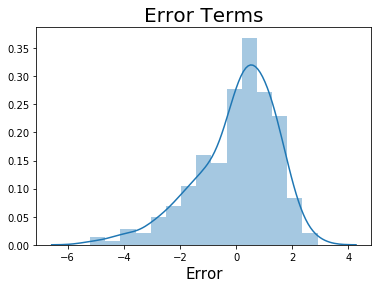

In [48]:
# To check error terms are normally distributed

y_train_pred4 = lm4.predict(X_train_new)

sns.distplot((y_train - y_train_pred4))
plt.title('Error Terms', fontsize =20)
plt.xlabel('Error', fontsize = 15)
plt.show()

In [49]:
cols4 = X_train_new.columns

In [50]:
X_test_4 = sm.add_constant(X_test)

X_test_4 = X_test_4[cols4]

In [51]:
y_test_pred4 = lm4.predict(X_test_4)

In [52]:
# R2-Score and MSE on train set
print('Training Set:')
print(r2_score(y_train, y_train_pred4))
print(mean_squared_error(y_train, y_train_pred4))

# R2-Score and MSE on test set
print('Testing Set:')
print(r2_score(y_test, y_test_pred4))
print(mean_squared_error(y_test, y_test_pred4))

Training Set:
0.8335922768522726
2.0475460609853013
Testing Set:
0.7856318734640985
2.427514728450105


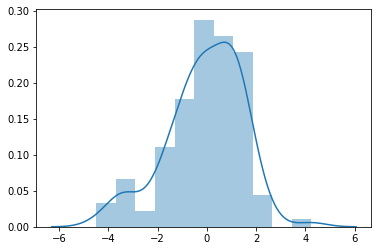

In [53]:
sns.distplot(y_test-y_test_pred0)

`Inferences:`After removing the insignificant features, lm4 is the final model. No much difference in r2_ score and MSE values between initial model (lm0) and final model (lm4). Let the lm4 be considered for this project.

In [54]:
import pickle
from sklearn.externals import joblib

# Save the model as pickel file.
joblib.dump(lm4, 'lm4.pkl')

# load the model from the file.
GPA_model = joblib.load('lm4.pkl')

Trying with Ridge and Lasso Algorithms and Cross Validation techniques to see whether the r2_score will be increased or not.

### Ridge and Lasso

In [55]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [56]:
params = {'alpha':[0.1, 0.2, 0.3,0.4, 0.5, 0.6,0.7, 0.8, 0.9,1,2,3, 4, 5,6, 7,8, 9,10,20,30,40,50,75,100,110,120,130,140,150]}

ridge = Ridge()

model_cv = GridSearchCV(estimator = ridge, param_grid =params, scoring = 'neg_mean_absolute_error', cv = 5, 
                        return_train_score = True, verbose  = 1)
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    1.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40,
                                   50, 75, 100, 110, 120, 130, 140, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [57]:
results_ridge = pd.DataFrame(model_cv.cv_results_)
results_ridge.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.109206,1.984587e-01,0.0030,1.095453e-03,0.1,{'alpha': 0.1},-0.962794,-1.205414,-1.228832,-1.162598,...,-1.142096,0.093998,26,-1.160968,-1.093562,-1.049788,-1.092478,-1.102463,-1.099852,0.035615
1,0.005600,2.939538e-03,0.0014,4.898624e-04,0.2,{'alpha': 0.2},-0.962773,-1.205429,-1.228844,-1.162567,...,-1.142083,0.094008,25,-1.160975,-1.093564,-1.049779,-1.092448,-1.102454,-1.099844,0.035621
2,0.003000,1.907349e-07,0.0012,4.000902e-04,0.3,{'alpha': 0.3},-0.962752,-1.205445,-1.228856,-1.162537,...,-1.142069,0.094019,24,-1.160981,-1.093566,-1.049771,-1.092418,-1.102445,-1.099836,0.035627
3,0.002800,3.999710e-04,0.0010,9.536743e-08,0.4,{'alpha': 0.4},-0.962731,-1.205461,-1.228868,-1.162506,...,-1.142056,0.094029,23,-1.160988,-1.093568,-1.049762,-1.092389,-1.102436,-1.099829,0.035633
4,0.003000,1.168008e-07,0.0010,2.132481e-07,0.5,{'alpha': 0.5},-0.962710,-1.205476,-1.228879,-1.162475,...,-1.142044,0.094039,22,-1.160995,-1.093570,-1.049753,-1.092359,-1.102429,-1.099821,0.035639


In [58]:
model_cv.best_score_

-1.1371303177959626

In [59]:
model_cv.best_params_

{'alpha': 50}

In [60]:
alpha = model_cv.best_params_['alpha']

ridge = Ridge(alpha = alpha)
ridge.fit(X_train_new, y_train)
ar1 = ridge.coef_
ar1

array([ 0.        ,  0.35826231,  0.42100917,  0.38262094,  0.56220605,
       -0.17211323])

In [61]:
y_pred_train = ridge.predict(X_train_new)
y_pred_test = ridge.predict(X_test_4)

In [62]:
# R2-Score and MSE on train set
print('Training Set:')
print(r2_score(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))

# R2-Score and MSE on test set
print('Testing Set:')
print(r2_score(y_test, y_pred_test))
print(mean_squared_error(y_test, y_pred_test))

Training Set:
0.8331304084951141
2.053229070869127
Testing Set:
0.7856488478414985
2.4273225098035627


In [63]:
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, param_grid =params, scoring = 'neg_mean_absolute_error', cv = 5, 
                        return_train_score = True, verbose  = 1)
model_cv.fit(X_train_new, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40,
                                   50, 75, 100, 110, 120, 130, 140, 150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [64]:
model_cv.best_params_

{'alpha': 0.1}

In [65]:
alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha = alpha)
lasso.fit(X_train_new, y_train)
al1 = lasso.coef_
al1

array([ 0.        ,  0.34373251,  0.4136614 ,  0.36541487,  0.57184165,
       -0.12629787])

In [66]:
y_pred_train = lasso.predict(X_train_new)
y_pred_test = lasso.predict(X_test_4)

In [67]:
# R2-Score and MSE on train set
print('Training Set:')
print(r2_score(y_train, y_pred_train))
print(mean_squared_error(y_train, y_pred_train))

# R2-Score and MSE on test set
print('Testing Set:')
print(r2_score(y_test, y_pred_test))
print(mean_squared_error(y_test, y_pred_test))

Training Set:
0.8322540714958337
2.0640118659043023
Testing Set:
0.7830428935452702
2.456832458591132


`Inferences:` After modeling using Ridge and Lasso the performance is more or less same and the Linear Regression model (lm4) can be considered as the final model.